Importing Packages

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [79]:
df_stores=pd.read_csv('stores_sales.csv', encoding='latin-1')


In [80]:
df_stores.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


# DATA PROFILING

In [125]:
df_stores.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [82]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [83]:
df_stores['Ship Date']=pd.to_datetime(df_stores['Ship Date'])
df_stores['Order Date'] = pd.to_datetime(df_stores['Order Date'])


In [84]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [85]:
dict = {}
for i in list(df_stores.columns):
    dict[i] = df_stores[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Row ID,2121
Order ID,1764
Order Date,889
Ship Date,960
Ship Mode,4
Customer ID,707
Customer Name,707
Segment,3
Country,1
City,371


In [86]:
df_stores.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [87]:
df_stores.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


# DATA CLEANING

In [88]:
store_sales = df_stores.drop(columns=['Row ID', 'Country', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 
                         'Postal Code', 'Category'])
store_sales.head(3)

,Order ID,Order Date,Ship Date,State,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Kentucky,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Kentucky,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,2015-10-11,2015-10-18,Florida,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


Removing Duplicates

In [89]:
duplicate_rows = store_sales[store_sales.duplicated()]
duplicate_rows.head()

,Order ID,Order Date,Ship Date,State,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
720,US-2014-150119,2014-04-23,2014-04-27,Ohio,East,FUR-CH-10002965,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [90]:
store_sales = store_sales.drop_duplicates()
store_sales.head()

,Order ID,Order Date,Ship Date,State,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Kentucky,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Kentucky,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,2015-10-11,2015-10-18,Florida,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,CA-2014-115812,2014-06-09,2014-06-14,California,West,FUR-FU-10001487,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,CA-2014-115812,2014-06-09,2014-06-14,California,West,FUR-TA-10001539,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# DATA VISUALIZATION

Sales by Region

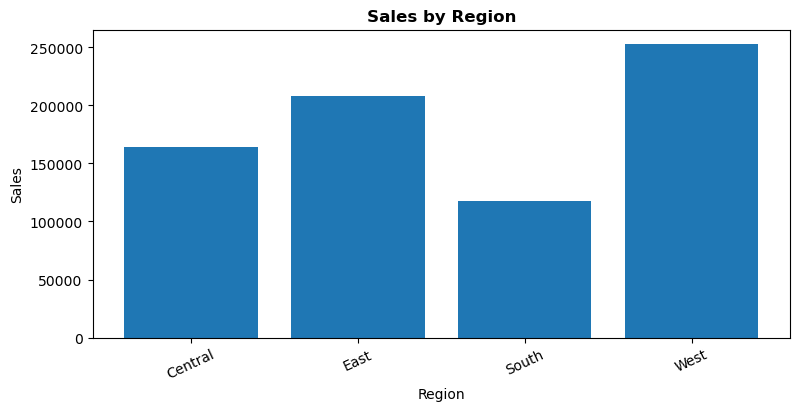

In [139]:
region_sales = store_sales.groupby("Region")["Sales"].sum().reset_index()
plt.figure(figsize=(9,4))
plt.bar(region_sales["Region"], region_sales["Sales"])
plt.title("Sales by Region", fontsize=12, fontweight="bold")
plt.xlabel("Region", fontsize=10)
plt.ylabel("Sales", fontsize=10)
plt.xticks(rotation=25)
plt.show()

Profit By Region

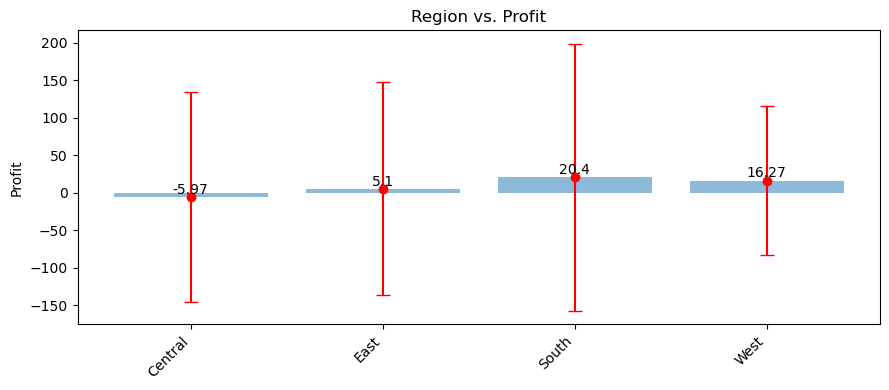

In [142]:
region_stats = store_sales.groupby('Region')['Profit'].agg(['mean', 'std']).reset_index()
region_stats.columns = ['Region', 'Mean Profit', 'Std Dev Profit']

# Graph
fig,ax = plt.subplots(figsize=(9,4))

# Plot the mean profit representing standard deviation
bar_positions = range(len(region_stats['Region']))
bar_heights = region_stats['Mean Profit']
error_bars = region_stats['Std Dev Profit']

# barplot
bars = ax.bar(bar_positions, bar_heights, align='center', alpha=0.5, ecolor='black', capsize=10)

# Title
ax.set_xticks(bar_positions)
ax.set_xticklabels(region_stats['Region'], rotation=45, ha='right')
ax.set_ylabel('Profit')
ax.set_title('Region vs. Profit')

# Error bars
plt.errorbar(bar_positions, bar_heights, yerr=error_bars, fmt='o', color='red', capsize=5)

# Adding values
for bar, height in zip(bars, bar_heights):
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.1, str(round(height, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Indexing the Order Date for Analysis

In [91]:
store_sales.set_index('Order Date', inplace=True)

In [92]:
monthly_sales = store_sales['Sales'].resample('M').sum()


In [93]:
monthly_sales

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7663.4650
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    

# PLOTTING MONTHLY SALES

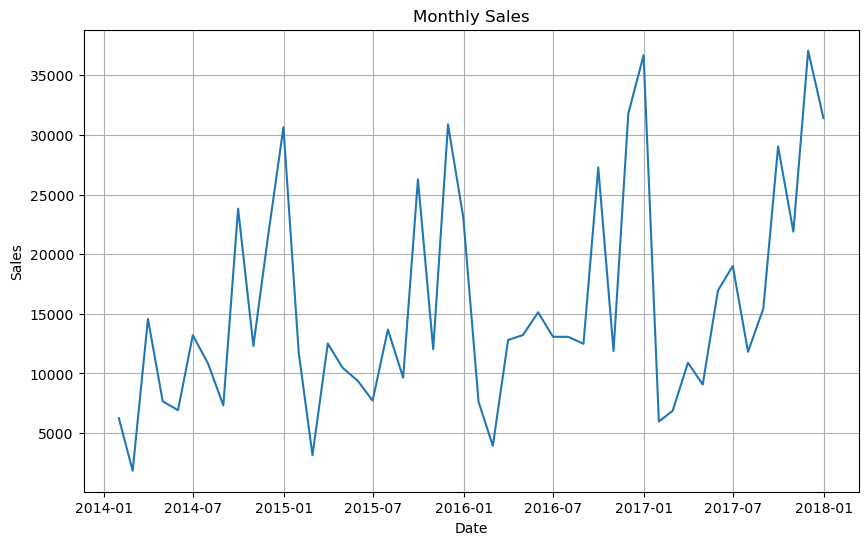

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# TIME SERIES ANALYSIS

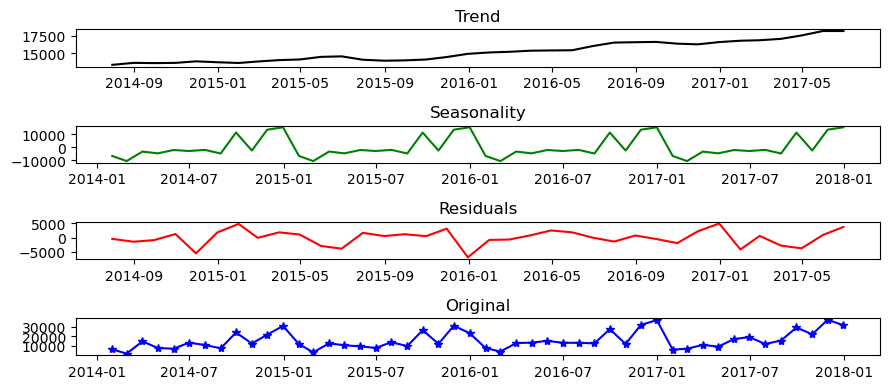

In [97]:


analysis = seasonal_decompose(monthly_sales, model='additive')
plt.figure(figsize=(9,4))

plt.subplot(4, 1, 1)
plt.plot(analysis.trend, label='Trend', color='black')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(analysis.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(analysis.resid, label='Residuals', color='red')
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(monthly_sales.index, monthly_sales.values, marker='*', label='Original', color='blue')
plt.title('Original')

plt.tight_layout()
plt.show()

# Dickey Fuller Test

In [53]:
from statsmodels.tsa.stattools import adfuller

In [100]:
results=adfuller(store_sales['Sales'])

In [101]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [102]:
adf_test(store_sales['Sales'])

ADF Statistics: -23.770859921127542
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [103]:
### 12 months 
## Use Techniques Differencing
store_sales['Seasonal Sales']=store_sales['Sales']-store_sales['Sales'].shift(12)

In [104]:
adf_test(store_sales['Seasonal Sales'].dropna())

ADF Statistics: -12.450132971850383
p- value: 3.590722078264662e-23
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Order Date'>

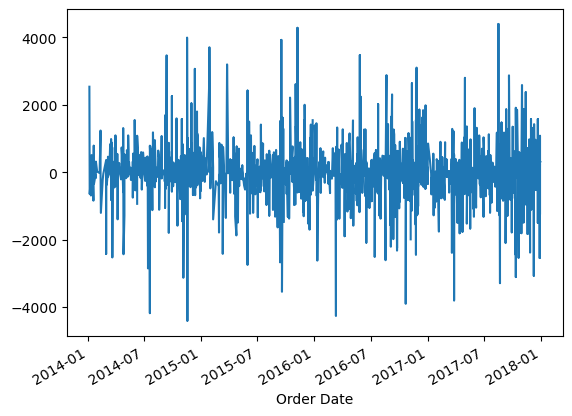

In [105]:
store_sales['Seasonal Sales'].plot()

# Auto regressive model

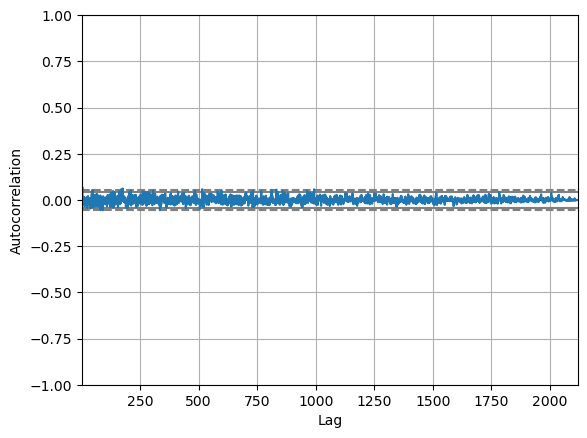

In [111]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(store_sales['Sales'])
plt.show()

# ACF & PACF

ACF identifies how the current value of a series performs well in relation to its past values. It takes all components of a time series, including trend, seasonality, and cyclic.

PACF identifies correlations of residuals with the next lag value. It neglects components that have already been explained by earlier lags

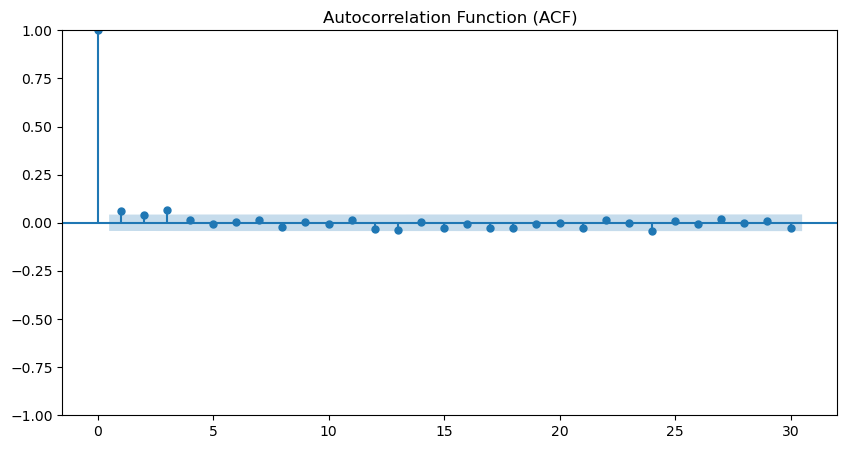

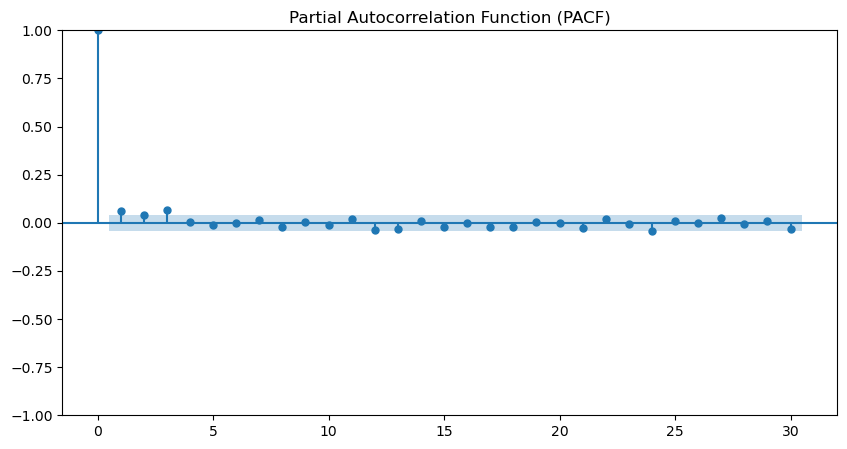

In [114]:
import statsmodels.api as sm

# Plot ACF
fig,ax1 = plt.subplots(figsize=(10,5))
sm.graphics.tsa.plot_acf(store_sales['Sales'],lags=30,ax=ax1)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig,ax2 = plt.subplots(figsize=(10,5))
sm.graphics.tsa.plot_pacf(store_sales['Sales'],lags=30,ax=ax2)
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

# Model Training

TRAIN_TEST_SPLIT

In [117]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
x = np.arange(len(monthly_sales)).reshape(-1, 1)
y = monthly_sales.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# ARIMA MODEL

In [118]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(y_train,order=(1,1,1))
model_fit=model.fit()

In [119]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -333.223
Date:                Wed, 11 Sep 2024   AIC                            672.446
Time:                        12:08:37   BIC                            676.843
Sample:                             0   HQIC                           673.903
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1941      0.335      0.579      0.563      -0.463       0.851
ma.L1         -0.8887      0.159     -5.581      0.000      -1.201      -0.577
sigma2      7.418e+07   3.57e-10   2.08e+17      0.000    7.42e+07    7.42e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 2.29
Prob(Q):                              0.70   Prob(JB):                         0.32
Heteroskedasticity (H):               0.88   Skew:                             0.62
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+34. Standard errors may be unstable.
"""

# SARIMAX MODEL

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [121]:
model1=SARIMAX(y_train,order=(1,1,1), seasonal_order=(1,1,1,12))
model1_fit=model1.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28027D+00    |proj g|=  6.91838D-01

At iterate    5    f=  6.05323D+00    |proj g|=  1.28622D-02

At iterate   10    f=  6.03598D+00    |proj g|=  7.49503D-03

At iterate   15    f=  6.03369D+00    |proj g|=  3.06386D-03

At iterate   20    f=  6.03352D+00    |proj g|=  1.29508D-03

At iterate   25    f=  6.03349D+00    |proj g|=  9.55191D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

In [122]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -199.105
Date:                            Wed, 11 Sep 2024   AIC                            408.210
Time:                                    12:15:16   BIC                            413.189
Sample:                                         0   HQIC                           409.182
                                             - 33                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6708      0.285      2.352      0.019       0.112       1.230
ma.L1         -0.9481      0.394     -2.409      0.016      -1.719      -0.177
ar.S.L12       0.5633      0.435      1.295      0.195      -0.289       1.416
ma.S.L12      -0.9228      0.632     -1.460      0.144      -2.162       0.316
sigma2      2.304e+07   4.68e-08   4.92e+14      0.000     2.3e+07     2.3e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.02   Jarque-Bera (JB):                 0.61
Prob(Q):                              0.05   Prob(JB):                         0.74
Heteroskedasticity (H):               0.20   Skew:                            -0.20
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.94e+30. Standard errors may be unstable.
"""

# Sales Forecasting

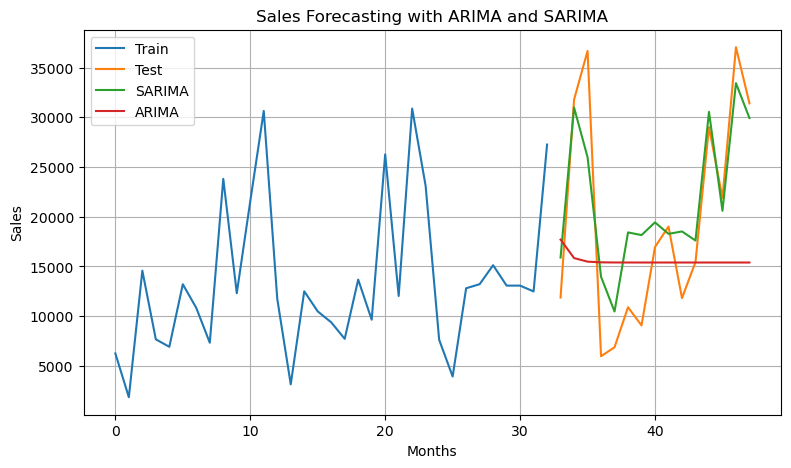

In [143]:
arima = model_fit.forecast(steps=len(x_test))
sarima =model1_fit.forecast(steps=len(x_test))
# Plot predictions
plt.figure(figsize=(9,5))
plt.plot(x_train, y_train, label='Train')
plt.plot(x_test, y_test, label='Test')
plt.plot(x_test, sarima, label='SARIMA')
plt.plot(x_test, arima, label='ARIMA')
plt.title('Sales Forecasting with ARIMA and SARIMA')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

# CONCLUSION

The plot above tells us that the SARIMA model (green line) gives us better forecasts compared to the ARIMA model (red line). The SARIMA predictions closely follow the actual sales trend, capturing both the overall pattern and the peaks in the data more accurately than the ARIMA model. This tells us that the SARIMA model, which takes seasonality into its forecasting process, is more suitable for capturing the complex patterns present in the  stores sales data.